<a href="https://colab.research.google.com/github/AfaCodea/AfaCodea/blob/main/AnalisisFrekuensi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Weeks #8 Tugas Analisis Frekuensi - Spektrum FrekuensiFile**


```
Nama              : Agil Prasunza
NIM               : 1232711008
Program Studi S1  : Teknik Informatika
Mata Kuliah       : Proses Sinyal Digital
Kampus            : Universitas Bakrie
```




# Penjelasan Kode:


> # 1. Impor Pustaka:
 Jadi librosa ini untuk memuat dan menganalisis file audio.
          sedangkan librosa.display Untuk beberapa fungsi visualisasi (meskipun tidak digunakan secara langsung di plot FFT ini).
          yang mana numpy (np) untuk operasi numerik, terutama array dan FFT.
          saya juga menambahkan matplotlib.pyplot (plt) untuk membuat plot. dan
          google.colab.files spesifik untuk Google Colab, digunakan untuk mengunggah file.

> # Langkah 2: Upload File Audio:

*   files.upload() membuka dialog untuk Anda memilih dan mengunggah file dari komputer Anda ke lingkungan Colab.
*   Nama file yang diunggah kemudian diambil.



> # Langkah 2: Muat dan Konversi ke PCM:

*   librosa.load(filename, sr=None):
Memuat file audio.
*   librosa secara otomatis menangani berbagai format audio.
*   Hasilnya adalah y (data audio sebagai array NumPy float, yang merupakan representasi PCM) dan sr (sampling rate audio).
*   sr=None memastikan sampling rate asli file audio dipertahankan. Jika Anda ingin meresample ke sampling rate tertentu, Anda bisa menggantinya (misalnya sr=44100).
*   Kode juga menyertakan pemeriksaan sederhana untuk audio stereo dan mengkonversinya menjadi mono dengan merata-ratakan kedua channel, karena analisis frekuensi DTMF biasanya dilakukan pada sinyal mono.



> # Langkah 3: Gunakan FFT:

*   n_fft = 2048: Menentukan jumlah titik FFT. Ini memengaruhi resolusi frekuensi. Nilai pangkat 2 (seperti 1024, 2048, 4096) sering digunakan karena efisiensi komputasi FFT.
*   np.fft.fft(y, n_fft): Menghitung Fast Fourier Transform dari sinyal audio y.
*   np.abs(Y)[:n_fft//2]: Menghitung magnitudo dari hasil FFT. Karena output FFT bersifat simetris untuk input riil, kita hanya mengambil separuh pertama ([:n_fft//2]).
*   np.fft.fftfreq(n_fft, d=1/sr)[:n_fft//2]: Menghitung frekuensi yang sesuai untuk setiap titik magnitudo FFT. d=1/sr adalah interval waktu antar sampel.



> # Langkah 4: Tampilkan Frekuensi Dominan di Atas Grafik:

*   plt.plot(frequencies, Y_magnitude): Membuat plot spektrum frekuensi (magnitudo vs frekuensi).
*   Kode selanjutnya mencoba mengidentifikasi dua frekuensi DTMF yang dominan:
    *   Ia mencari beberapa puncak tertinggi dalam spektrum.
    *   Kemudian, ia membandingkan frekuensi puncak tersebut dengan frekuensi standar DTMF (grup rendah dan grup tinggi) dengan toleransi tertentu.
    *   Jika ditemukan kecocokan, frekuensi tersebut ditandai pada grafik dan dicetak.
*   Ini adalah pendekatan dasar. Identifikasi DTMF yang lebih canggih mungkin melibatkan pemfilteran atau pencarian puncak yang lebih spesifik dalam rentang frekuensi DTMF.



---



# Cara Menggunakan di Google Colab:

1. Buka notebook baru di Google Colab (colab.research.google.com).
2. Salin dan tempel kode di atas ke dalam sel kode.
3. Jalankan sel kode tersebut.
4. Sebuah tombol "Choose Files" akan muncul. Klik tombol tersebut dan pilih file audio DTMF Anda dari komputer.
5. Setelah file diunggah, kode akan melanjutkan pemrosesan dan menampilkan grafik spektrum frekuensi beserta informasi frekuensi dominan yang terdeteksi.

Tetapi kita harus ingat bahwa kualitas deteksi frekuensi DTMF dapat dipengaruhi oleh noise dalam audio, yang mana durasi sinyal DTMF, dan parameter seperti n_fft dan tolerance. mungkin perlu menyesuaikan parameter ini untuk hasil terbaik tergantung pada file audio spesifik yang kita masukan.



In [ ]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

In [ ]:
# Langkah 1: Upload file audio ke Google Colab
uploaded = files.upload()

Saving Dtmf-1.wav to Dtmf-1.wav


File yang diupload: Dtmf-1.wav
Sampling rate: 44100 Hz
Durasi audio: 0.18 detik
Konversi ke PCM (array NumPy float) berhasil.

Frekuensi DTMF yang mungkin (berdasarkan 2 puncak tertinggi):
Puncak terdeteksi: Frekuensi = 1205.86 Hz, Magnitudo = 98.46
Puncak terdeteksi: Frekuensi = 1227.39 Hz, Magnitudo = 83.41
Puncak terdeteksi: Frekuensi = 1184.33 Hz, Magnitudo = 73.88
Puncak terdeteksi: Frekuensi = 689.06 Hz, Magnitudo = 67.55

Kombinasi frekuensi DTMF terdeteksi: 697 Hz dan 1209 Hz


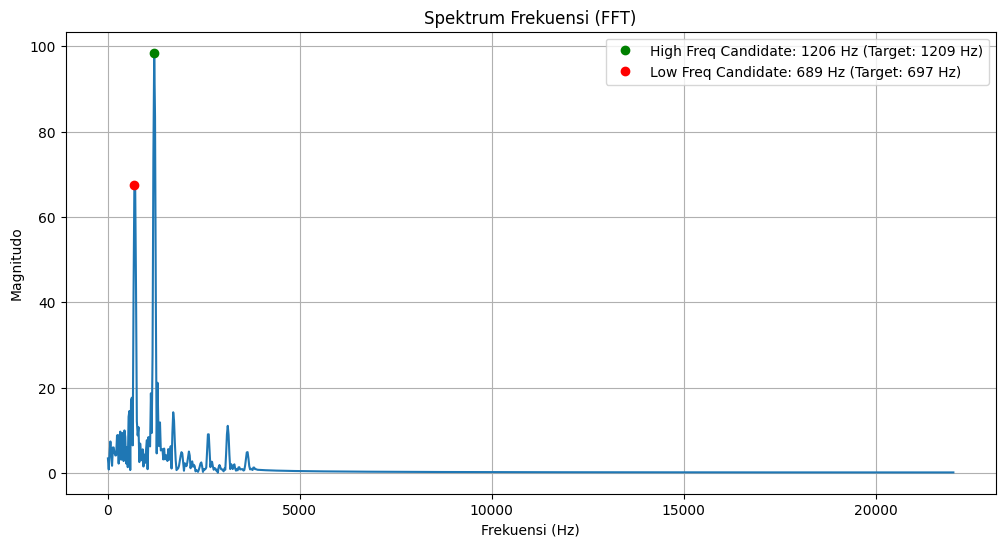

In [ ]:
if not uploaded:
    print("Tidak ada file yang diupload. Silakan upload file audio DTMF.")
else:
    filename = next(iter(uploaded))
    print(f'File yang diupload: {filename}')

    try:
        y, sr = librosa.load(filename, sr=44100)
        print(f"Sampling rate: {sr} Hz")
        print(f"Durasi audio: {len(y)/sr:.2f} detik")

        if y.ndim > 1 and y.shape[0] > 1:
            print("Audio stereo terdeteksi, mengkonversi ke mono.")
            y = np.mean(y, axis=0)

        print("Konversi ke PCM (array NumPy float) berhasil.")
        n_fft = 2048
        Y = np.fft.fft(y, n_fft)
        Y_magnitude = np.abs(Y)[:n_fft//2]
        frequencies = np.fft.fftfreq(n_fft, d=1/sr)[:n_fft//2]

        plt.figure(figsize=(12, 6))
        plt.plot(frequencies, Y_magnitude)
        plt.title('Spektrum Frekuensi (FFT)')
        plt.xlabel('Frekuensi (Hz)')
        plt.ylabel('Magnitudo')
        plt.grid(True)

        sorted_indices = np.argsort(Y_magnitude)[::-1]

        print("\nFrekuensi DTMF yang mungkin (berdasarkan 2 puncak tertinggi):")

        dtmf_low_freqs = [697, 770, 852, 941]
        dtmf_high_freqs = [1209, 1336, 1477, 1633]
        tolerance = 20

        detected_low_freq = None
        detected_high_freq = None

        peaks_info = []


        num_peaks_to_check = 10
        for i in range(min(num_peaks_to_check, len(sorted_indices))):
            peak_idx = sorted_indices[i]
            freq = frequencies[peak_idx]
            mag = Y_magnitude[peak_idx]


            if freq < 50:
                continue

            peaks_info.append({'freq': freq, 'mag': mag})
            print(f"Puncak terdeteksi: Frekuensi = {freq:.2f} Hz, Magnitudo = {mag:.2f}")

            # Apakah frekuensi ini cocok dengan frekuensi DTMF rendah
            if detected_low_freq is None:
                for dtmf_f in dtmf_low_freqs:
                    if abs(freq - dtmf_f) < tolerance:
                        detected_low_freq = dtmf_f
                        # Tandai di grafik
                        plt.plot(freq, mag, 'ro', label=f'Low Freq Candidate: {freq:.0f} Hz (Target: {dtmf_f} Hz)')
                        break

            # Apakah frekuensi ini cocok dengan frekuensi DTMF tinggi
            if detected_high_freq is None:
                for dtmf_f in dtmf_high_freqs:
                    if abs(freq - dtmf_f) < tolerance:
                        detected_high_freq = dtmf_f
                        # Tandai di grafik
                        plt.plot(freq, mag, 'go', label=f'High Freq Candidate: {freq:.0f} Hz (Target: {dtmf_f} Hz)')
                        break


            if detected_low_freq and detected_high_freq:
                break

        if detected_low_freq and detected_high_freq:
            print(f"\nKombinasi frekuensi DTMF terdeteksi: {detected_low_freq} Hz dan {detected_high_freq} Hz")
        else:
            print("\nTidak dapat mendeteksi kombinasi frekuensi DTMF yang valid dari puncak tertinggi.")
            print("Coba periksa grafik spektrum secara manual atau sesuaikan parameter 'tolerance' dan 'num_peaks_to_check'.")


        if plt.gca().get_legend_handles_labels()[0]:
            plt.legend()
        plt.show()

    except Exception as e:
        print(f"Terjadi kesalahan: {e}")
        print("Pastikan file yang diupload adalah format audio yang didukung (misalnya .wav, .mp3).")

\

# **Kesimpulan**
Secara keseluruhan, latihan ini memberikan pemahaman praktis tentang bagaimana sinyal audio dapat dianalisis untuk mengekstrak informasi frekuensi menggunakan alat komputasi modern dan teknik pemrosesan sinyal digital. Ini adalah dasar penting dalam banyak aplikasi audio, telekomunikasi, dan pengenalan pola.